<a href="https://colab.research.google.com/github/Trading-com-Dados/desenvolvimento_interno/blob/main/20220504_Backtesting_a_mao_PMF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://tradingcomdados.com/images/logotipo/logotipo-trading-com-dados.svg" width="300">

---
# **BACKTESTING  "*à mão*": o céu é o limite!** 
---
#### *Disclaimer:*
#### Este código foi elaborado para fins exclusivamente educacionais. O conteúdo aqui apresentado visa fornecer informações complementares para auxiliar o investidor na tomada de suas próprias decisões de investimento. Reforçando, nenhum tópico aqui abordado constitui qualquer tipo de indicação/oferta/solicitação de compra/venda de qualquer produto.
---



# **1. Bibliotecas utilizadas**

In [37]:
!pip install yfinance
!pip install ta

In [39]:
import numpy as np
import pandas as pd
from datetime import datetime
import pytz

import yfinance as yf
import ta

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# **2. Definir o setup e baixar os dados**

## 2.1. Cruzamento entre preço e média móvel

Neste primeiro exemplo, trabalharemos apenas com a ponta compradora, ou seja, venda apenas para fechar a posição<p>

**Sinal de entrada:**

Quando o preço cruzar a média móvel para cima: **COMPRA**<p>

1) Preço de fechamento do candle atual ficou acima da MM9<p>
2) Preço de fechamento do candle anterior estava abaixo da MM9<p>

**Sinal de saída (encerrar posição):**

Quando estiver comprado e o preço cruzar a média móvel para baixo: **VENDA**<p>

1) Preço de fechamento do candle atual ficou abaixo da MM9<p>
2) Preço de fechamento do candle anterior estava acima da MM9<p>

## 2.2. Dados Bitcoin pelo Yahoo Finance

In [41]:
## Dados diários de Bitcoin para o ano de 2021 (criptomoedas são 7d/24h de negociações)

cotacoes_BTC_yf = yf.download("BTC-USD", start = '2021-01-01', end = '2021-12-31', interval = "1d")
cotacoes_BTC_yf

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782
...,...,...,...,...,...,...
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299


## 2.3. Indicador MM e visualização do setup

In [42]:
## Cálculo Média Móvel de 9 períodos

cotacoes_BTC_yf['MMA9'] = cotacoes_BTC_yf['Close'].rolling(window=9).mean()
cotacoes_BTC_yf.head(20)

,Open,High,Low,Close,Adj Close,Volume,MMA9
Date,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,NaN
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,NaN
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,NaN
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,NaN
2021-01-06,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,75289433811,NaN
2021-01-07,36833.875000,40180.367188,36491.191406,39371.042969,39371.042969,84762141031,NaN
2021-01-08,39381.765625,41946.738281,36838.636719,40797.609375,40797.609375,88107519480,NaN
2021-01-09,40788.640625,41436.351562,38980.875000,40254.546875,40254.546875,61984162837,35277.261068


In [43]:
# Visão geral dos dados e do indicador da Média Móvel

fig = go.Figure(go.Candlestick(name='Bitcoin_USD', x=cotacoes_BTC_yf.index, open=cotacoes_BTC_yf['Open'], high = cotacoes_BTC_yf['High'],
                               low=cotacoes_BTC_yf['Low'], close=cotacoes_BTC_yf['Close'],showlegend=False))

fig.add_trace(go.Scatter(name='MMA_9p', x=cotacoes_BTC_yf.index, y=cotacoes_BTC_yf.MMA9, marker_color='blue'))

fig.update_layout(title='', xaxis_title="<b>Data", yaxis_title="<b>Bitcoin (USD)", legend_title="",
                  font=dict(family="Arial, Arial, Arial",size=20,color="black"),paper_bgcolor="#f7f8fa")

fig.update_layout(xaxis_rangeslider_visible=False, margin=dict(l=120, r=20, t=20, b=20), template = 'simple_white',
                  width=1200,height=600,legend=dict(orientation="h",yanchor="bottom",y=0.9,xanchor="right",x=0.15),
                  )

fig.show()

In [44]:
# Visualizar um range menor de datas para explorar o setup

data_figure = cotacoes_BTC_yf[(cotacoes_BTC_yf.index>='2021-01-01') & (cotacoes_BTC_yf.index<='2021-01-20')]

fig = go.Figure(go.Candlestick(name='Bitcoin_USD', x=data_figure.index, open=data_figure['Open'], high = data_figure['High'],
                               low=data_figure['Low'], close=data_figure['Close'],showlegend=False))

fig.add_trace(go.Scatter(name='MMA_9p', x=data_figure.index, y=data_figure.MMA9, marker_color='blue'))

fig.add_annotation(x='2021-01-14',y=40000, xref="x",yref="y",text="<b>Candle_Sinalizador",showarrow=True,font=dict(family="Arial",size=12,color="black"),align="center",arrowhead=2,
                   arrowsize=1,arrowwidth=2,arrowcolor="black")

fig.update_layout(title='', xaxis_title="<b>Data", yaxis_title="<b>Bitcoin (USD)", legend_title="",
                  font=dict(family="Arial, Arial, Arial",size=20,color="black"),paper_bgcolor="#f7f8fa")

fig.update_layout(xaxis_rangeslider_visible=False, margin=dict(l=120, r=20, t=20, b=20), template = 'simple_white',
                  width=1200,height=600,legend=dict(orientation="h",yanchor="bottom",y=0.9,xanchor="right",x=0.15))

fig.show()

# **3. Localizar os sinais de entrada (candles sinalizadores) no dataframe**



Regra 1) Preço de fechamento do candle atual ficou acima da MM9<p>
Regra 2) Preço de fechamento do candle anterior estava abaixo da MM9

In [45]:
# REGRA 1: Verificar se o preço de fechamento é maior que  MM e gerar um booleano de TRUE or FALSE

cotacoes_BTC_yf['Regra_1'] = cotacoes_BTC_yf['Close'] > cotacoes_BTC_yf['MMA9']
cotacoes_BTC_yf.head(20)

,Open,High,Low,Close,Adj Close,Volume,MMA9,Regra_1
Date,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,False
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,NaN,False
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,NaN,False
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,NaN,False
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,NaN,False
2021-01-06,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,75289433811,NaN,False
2021-01-07,36833.875000,40180.367188,36491.191406,39371.042969,39371.042969,84762141031,NaN,False
2021-01-08,39381.765625,41946.738281,36838.636719,40797.609375,40797.609375,88107519480,NaN,False
2021-01-09,40788.640625,41436.351562,38980.875000,40254.546875,40254.546875,61984162837,35277.261068,True


In [46]:
# REGRA 2: Verificar se o preço de fechamento do candle anterior estava menor que a MM
# Função shift para acessar candles específicos. Ex.: shift(2) = duas células acima no dataframe

cotacoes_BTC_yf['Regra_2'] = cotacoes_BTC_yf['Close'].shift(1) < cotacoes_BTC_yf['MMA9'].shift(1)
cotacoes_BTC_yf.head(20)

,Open,High,Low,Close,Adj Close,Volume,MMA9,Regra_1,Regra_2
Date,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,False,False
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,NaN,False,False
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,NaN,False,False
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,NaN,False,False
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,NaN,False,False
2021-01-06,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,75289433811,NaN,False,False
2021-01-07,36833.875000,40180.367188,36491.191406,39371.042969,39371.042969,84762141031,NaN,False,False
2021-01-08,39381.765625,41946.738281,36838.636719,40797.609375,40797.609375,88107519480,NaN,False,False
2021-01-09,40788.640625,41436.351562,38980.875000,40254.546875,40254.546875,61984162837,35277.261068,True,False


In [47]:
# Caso as duas regras sejam verdadeiras, temos o nosso candle sinalizador

cotacoes_BTC_yf['Candle_sinalizador'] = (cotacoes_BTC_yf['Regra_1']==True) & (cotacoes_BTC_yf['Regra_2']==True)
cotacoes_BTC_yf.head(20)

,Open,High,Low,Close,Adj Close,Volume,MMA9,Regra_1,Regra_2,Candle_sinalizador
Date,,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,False,False,False
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,NaN,False,False,False
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,NaN,False,False,False
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,NaN,False,False,False
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,NaN,False,False,False
2021-01-06,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,75289433811,NaN,False,False,False
2021-01-07,36833.875000,40180.367188,36491.191406,39371.042969,39371.042969,84762141031,NaN,False,False,False
2021-01-08,39381.765625,41946.738281,36838.636719,40797.609375,40797.609375,88107519480,NaN,False,False,False
2021-01-09,40788.640625,41436.351562,38980.875000,40254.546875,40254.546875,61984162837,35277.261068,True,False,False


In [48]:
candles_sinalizadores = cotacoes_BTC_yf[cotacoes_BTC_yf['Candle_sinalizador']==True]
print("Foram observados",len(candles_sinalizadores),"candles sinalizadores considerando o período analisado")
candles_sinalizadores.head()

Foram observados 34 candles sinalizadores considerando o período analisado


,Open,High,Low,Close,Adj Close,Volume,MMA9,Regra_1,Regra_2,Candle_sinalizador
Date,,,,,,,,,,
2021-01-14,37325.109375,39966.406250,36868.562500,39187.328125,39187.328125,63615990033,37955.256510,True,True,True
2021-01-28,30441.041016,33858.312500,30023.207031,33466.097656,33466.097656,76517157706,32507.902127,True,True,True
2021-03-01,45159.503906,49784.015625,45115.093750,49631.242188,49631.242188,53891300112,49407.566840,True,True,True
2021-03-03,48415.816406,52535.136719,48274.320312,50538.242188,50538.242188,53220811975,47982.007378,True,True,True
2021-03-17,56825.828125,58969.816406,54528.628906,58870.894531,58870.894531,60258313191,57566.475260,True,True,True


In [49]:
# Visualizar um range menor de datas para explorar o setup

data_figure = cotacoes_BTC_yf[(cotacoes_BTC_yf.index>='2021-01-26') & (cotacoes_BTC_yf.index<='2021-01-28')]

fig = go.Figure(go.Candlestick(name='Bitcoin_USD', x=data_figure.index, open=data_figure['Open'], high = data_figure['High'],
                               low=data_figure['Low'], close=data_figure['Close'],showlegend=False))

fig.add_trace(go.Scatter(name='MMA_9p', x=data_figure.index, y=data_figure.MMA9, marker_color='blue'))

fig.add_annotation(x='2021-01-28',y=34000, xref="x",yref="y",text="<b>Candle_Sinalizador",showarrow=True,font=dict(family="Arial",size=12,color="black"),align="center",arrowhead=2,
                   arrowsize=1,arrowwidth=2,arrowcolor="black")

fig.update_layout(title='', xaxis_title="<b>Data", yaxis_title="<b>Bitcoin (USD)", legend_title="",
                  font=dict(family="Arial, Arial, Arial",size=20,color="black"),paper_bgcolor="#f7f8fa")

fig.update_layout(xaxis_rangeslider_visible=False, margin=dict(l=120, r=20, t=20, b=20), template = 'simple_white',
                  width=800,height=600,legend=dict(orientation="h",yanchor="bottom",y=0.9,xanchor="right",x=0.25))

fig.show()

# **4. Registrar os preços de compra (Buy at Market)**

Nesse caso, abriremos nossa posição na abertura do próximo candle, ou seja, assim q confirmamos o candle sinalizador

In [12]:
# Acessar o preço de abertura do próximo candle, dessa vez com shift (-1)
# É importante lembrar que o preço de compra só será válido em candles sinalizadores, mesmo aparecendo em todos os candles
# Isso evita que tenhamos que criar estruturas de repetição desnecessárias

cotacoes_BTC_yf['Compra_merc'] = cotacoes_BTC_yf['Open'].shift(-1)
cotacoes_BTC_yf

,Open,High,Low,Close,Adj Close,Volume,MMA9,Regra_1,Regra_2,Candle_sinalizador,Compra_merc
Date,,,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,False,False,False,29376.455078
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,NaN,False,False,False,32129.408203
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,NaN,False,False,False,32810.949219
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,NaN,False,False,False,31977.041016
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,NaN,False,False,False,34013.613281
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,49404.327257,True,False,False,50679.859375
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,49502.309462,False,False,False,47623.871094
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299,49453.913194,False,True,False,46490.605469


In [50]:
## GRÁFICO QUE DEMONSTRA AS ENTRADAS DA ESTRATÉGIA

fig = make_subplots(rows=1, cols=2)

## Figura 1

data_figure = cotacoes_BTC_yf[(cotacoes_BTC_yf.index>='2021-01-22') & (cotacoes_BTC_yf.index<='2021-02-25')]

fig.add_trace(go.Candlestick(name='Bitcoin_BRL', x=data_figure.index, open=data_figure['Open'], high = data_figure['High'], low=data_figure['Low'], close=data_figure['Close']), row=1,col=1)
fig.update_yaxes(title_text="<b> Preço Bitcoin (R$)",row=1, col=1)
fig.add_trace(go.Scatter(name='MMA_9p', x=data_figure.index, y=data_figure.MMA9, marker_color='blue'),row=1,col=1)
fig.add_vrect(x0='2021-01-27', x1='2021-02-02', fillcolor="green", opacity=0.25, line_width=0,row=1, col=1)
fig.add_trace(go.Scatter(x=['2021-01-30'],y=[45000],mode="text",text="<b>Zoom",textposition="top center",showlegend=False),row=1, col=1)

## Figura 2
data_figure2 = cotacoes_BTC_yf[(cotacoes_BTC_yf.index>='2021-01-27') & (cotacoes_BTC_yf.index<='2021-02-02')]

fig.add_trace(go.Candlestick(name='Bitcoin_BRL', x=data_figure2.index, open=data_figure2['Open'], high = data_figure2['High'], low=data_figure2['Low'], close=data_figure2['Close'],showlegend=False), row=1,col=2)
fig.add_annotation(x='2021-01-28',y=31000, xref="x",yref="y",text="<b>Candle_Sinalizador",showarrow=True,font=dict(family="Arial",size=12,color="black"),align="center",arrowhead=2,
                   arrowsize=1,arrowwidth=2,arrowcolor="black",row=1, col=2)
fig.add_annotation(x='2021-01-29',y=34300, xref="x",yref="y",text="<b>Entrada compra",showarrow=True,font=dict(family="Arial",size=12,color="black"),align="center",arrowhead=2,
                   arrowsize=1,arrowwidth=2,arrowcolor="black",row=1, col=2)
fig.add_trace(go.Scatter(name='MMA_9p', x=data_figure2.index, y=data_figure2.MMA9, marker_color='blue',showlegend=False),row=1,col=2)

## Geral
fig.update_layout(xaxis_rangeslider_visible=False,xaxis2_rangeslider_visible=False,template = 'simple_white',paper_bgcolor="#f7f8fa",
                  legend=dict(orientation="h",xanchor="right",x=1,yanchor="bottom",y=1.1),title_text='Sinal Compra Cruzamento Preço/Média',
                  font=dict(family="Arial, Arial, Arial",color="black"),width=1000 ,height=500)

fig.show()

# **5. Determinar o sinal de saída e registrar o preço**

Nessa estratégia de cruzamento de preço e MM, temos o que chamamos de trailing stop. <p>

Não temos alvos pré definidos (seja stop loss ou take profit). O encerramento da operação ocorrerá basicamente quando o preço cruzar para baixo a MM

In [51]:
# Vejamos agora se o candle fechou abaixo da MM
# Novamente, evitaremos criar estruturas de repetição desnecessárias. A análise final se fechou abaixo só será válida quando estivermos com posição aberta

cotacoes_BTC_yf['Fechou_abaixo'] = cotacoes_BTC_yf['Close'] < cotacoes_BTC_yf['MMA9']
cotacoes_BTC_yf

,Open,High,Low,Close,Adj Close,Volume,MMA9,Regra_1,Regra_2,Candle_sinalizador,Fechou_abaixo
Date,,,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,False,False,False,False
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,NaN,False,False,False,False
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,NaN,False,False,False,False
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,NaN,False,False,False,False
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,NaN,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,49404.327257,True,False,False,False
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,49502.309462,False,False,False,True
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299,49453.913194,False,True,False,True


In [52]:
# Para sabermos se estavamos posicionados, fechamento do candle anterior deveria estar acima da MM

cotacoes_BTC_yf['Cd_ant_acima'] = cotacoes_BTC_yf['Close'].shift(1) > cotacoes_BTC_yf['MMA9'].shift(1)
cotacoes_BTC_yf

,Open,High,Low,Close,Adj Close,Volume,MMA9,Regra_1,Regra_2,Candle_sinalizador,Fechou_abaixo,Cd_ant_acima
Date,,,,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,False,False,False,False,False
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,NaN,False,False,False,False,False
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,NaN,False,False,False,False,False
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,NaN,False,False,False,False,False
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,NaN,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,49404.327257,True,False,False,False,True
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,49502.309462,False,False,False,True,True
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299,49453.913194,False,True,False,True,False


In [55]:
# Checando se temos um candle sinalizador de saída

cotacoes_BTC_yf['Sinal_saida'] = (cotacoes_BTC_yf.Fechou_abaixo==True) & (cotacoes_BTC_yf.Cd_ant_acima==True)
cotacoes_BTC_yf

,Open,High,Low,Close,Adj Close,Volume,MMA9,Regra_1,Regra_2,Candle_sinalizador,Fechou_abaixo,Cd_ant_acima,Sinal_saida,Venda_merc
Date,,,,,,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,False,False,False,False,False,False,29376.455078
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,NaN,False,False,False,False,False,False,32129.408203
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,NaN,False,False,False,False,False,False,32810.949219
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,NaN,False,False,False,False,False,False,31977.041016
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,NaN,False,False,False,False,False,False,34013.613281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,49404.327257,True,False,False,False,True,False,50679.859375
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,49502.309462,False,False,False,True,True,True,47623.871094
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299,49453.913194,False,True,False,True,False,False,46490.605469


In [56]:
# Considerando que o preço tenha fechado abaixo da média, registraremos o preço de abertura do próximo candle (shift -1), onde encerramos a posição

cotacoes_BTC_yf['Venda_merc'] = cotacoes_BTC_yf['Open'].shift(-1)
cotacoes_BTC_yf

,Open,High,Low,Close,Adj Close,Volume,MMA9,Regra_1,Regra_2,Candle_sinalizador,Fechou_abaixo,Cd_ant_acima,Sinal_saida,Venda_merc
Date,,,,,,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,False,False,False,False,False,False,29376.455078
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,NaN,False,False,False,False,False,False,32129.408203
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,NaN,False,False,False,False,False,False,32810.949219
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,NaN,False,False,False,False,False,False,31977.041016
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,NaN,False,False,False,False,False,False,34013.613281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,49404.327257,True,False,False,False,True,False,50679.859375
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,49502.309462,False,False,False,True,True,True,47623.871094
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299,49453.913194,False,True,False,True,False,False,46490.605469


# **6. Organizar os preços de entrada (compra) e saída (venda)**

In [57]:
# Filtrar novamente apenas os candles sinalizadores

print('Tivemos',len(cotacoes_BTC_yf[cotacoes_BTC_yf.Candle_sinalizador==True]),'entradas de compra')
cotacoes_BTC_yf[cotacoes_BTC_yf.Candle_sinalizador==True].head()

Tivemos 34 entradas de compra


,Open,High,Low,Close,Adj Close,Volume,MMA9,Regra_1,Regra_2,Candle_sinalizador,Fechou_abaixo,Cd_ant_acima,Sinal_saida,Venda_merc
Date,,,,,,,,,,,,,,
2021-01-14,37325.109375,39966.406250,36868.562500,39187.328125,39187.328125,63615990033,37955.256510,True,True,True,False,False,False,39156.707031
2021-01-28,30441.041016,33858.312500,30023.207031,33466.097656,33466.097656,76517157706,32507.902127,True,True,True,False,False,False,34318.671875
2021-03-01,45159.503906,49784.015625,45115.093750,49631.242188,49631.242188,53891300112,49407.566840,True,True,True,False,False,False,49612.105469
2021-03-03,48415.816406,52535.136719,48274.320312,50538.242188,50538.242188,53220811975,47982.007378,True,True,True,False,False,False,50522.304688
2021-03-17,56825.828125,58969.816406,54528.628906,58870.894531,58870.894531,60258313191,57566.475260,True,True,True,False,False,False,58893.078125


In [19]:
# Registrar os preços de compras

precos_compras = cotacoes_BTC_yf[cotacoes_BTC_yf.Candle_sinalizador==True]['Compra_merc']
precos_compras

Date
2021-01-14    39156.707031
2021-01-28    34318.671875
2021-03-01    49612.105469
2021-03-03    50522.304688
2021-03-17    58893.078125
2021-03-19    58332.261719
2021-03-27    55974.941406
2021-04-04    58760.875000
2021-04-10    59846.230469
2021-04-26    54030.304688
2021-05-05    57441.308594
2021-05-26    39316.890625
2021-05-31    37293.792969
2021-06-02    37599.410156
2021-06-09    37389.515625
2021-06-13    39016.968750
2021-06-27    34679.121094
2021-07-03    34665.566406
2021-07-11    34254.015625
2021-07-21    32138.873047
2021-08-05    40865.867188
2021-08-19    46723.121094
2021-08-27    49072.585938
2021-09-01    48807.847656
2021-09-14    47098.000000
2021-09-30    43816.742188
2021-10-25    63032.761719
2021-10-29    62239.363281
2021-11-02    63254.335938
2021-11-07    63344.066406
2021-11-28    57291.906250
2021-12-12    50114.742188
2021-12-15    48900.464844
2021-12-21    48937.097656
Name: Compra_merc, dtype: float64

In [59]:
# Filtrar apenas as saídas, ou seja, Compra_merc e Fechou_abaixo

print('Tivemos',len(cotacoes_BTC_yf[cotacoes_BTC_yf.Sinal_saida==True]),'saídas de venda')
cotacoes_BTC_yf[cotacoes_BTC_yf.Sinal_saida==True].head()

Tivemos 35 saídas de venda


,Open,High,Low,Close,Adj Close,Volume,MMA9,Regra_1,Regra_2,Candle_sinalizador,Fechou_abaixo,Cd_ant_acima,Sinal_saida,Venda_merc
Date,,,,,,,,,,,,,,
2021-01-11,38346.531250,38346.531250,30549.599609,35566.656250,35566.656250,123320567399,36657.447483,False,False,False,True,True,True,35516.359375
2021-01-15,39156.707031,39577.710938,34659.589844,36825.367188,36825.367188,67760757881,37955.368056,False,False,False,True,True,True,36821.648438
2021-02-23,54204.929688,54204.929688,45290.589844,48824.425781,48824.425781,106102492824,52614.786458,False,False,False,True,True,True,48835.085938
2021-03-02,49612.105469,50127.511719,47228.843750,48378.988281,48378.988281,47530897720,48389.682726,False,False,False,True,True,True,48415.816406
2021-03-15,59267.429688,60540.992188,55393.164062,55907.199219,55907.199219,66419369890,56208.410590,False,False,False,True,True,True,55840.785156


Note que tivemos 34 entradas mas 35 saídas. Sem dúvida há algo errado.<p>
Nesse caso temos um pequeno problema porque como determinamos apenas entradas de compra, nossa primeira entrada ocorreu apenas no dia 14/01/2021. Voltemos à figura dos períodos iniciais

In [21]:
# Visualizar um range menor de datas para explorar o setup

data_figure = cotacoes_BTC_yf[(cotacoes_BTC_yf.index>='2021-01-01') & (cotacoes_BTC_yf.index<='2021-01-20')]

fig = go.Figure(go.Candlestick(name='Bitcoin_USD', x=data_figure.index, open=data_figure['Open'], high = data_figure['High'],
                               low=data_figure['Low'], close=data_figure['Close'],showlegend=False))

fig.add_trace(go.Scatter(name='MMA_9p', x=data_figure.index, y=data_figure.MMA9, marker_color='blue'))

fig.add_annotation(x='2021-01-11',y=39000, xref="x",yref="y",text="<b>Sinal de saída 'FALSO'",showarrow=True,font=dict(family="Arial",size=12,color="black"),align="center",arrowhead=2,
                   arrowsize=1,arrowwidth=2,arrowcolor="black")

fig.update_layout(title='', xaxis_title="<b>Data", yaxis_title="<b>Bitcoin (USD)", legend_title="",
                  font=dict(family="Arial, Arial, Arial",size=20,color="black"),paper_bgcolor="#f7f8fa")

fig.update_layout(xaxis_rangeslider_visible=False, margin=dict(l=120, r=20, t=20, b=20), template = 'simple_white',
                  width=1200,height=600,legend=dict(orientation="h",yanchor="bottom",y=0.9,xanchor="right",x=0.15))

fig.show()

Note que no dia 11/01/2021 tivemos um "sinal de saída", já que o preço de fechamento estava acima no candle anterior e no dia 11/01 ficou abaixo.<p>
Porem não faz sentido um sinal de saída sem entrada. Vamos simplesmente remover esse sinal de saída inicial e combinar os dados de entradas e saída

In [22]:
# Registrar os preços de vendas (saídas), excluindo a primeira linha

precos_vendas = cotacoes_BTC_yf[cotacoes_BTC_yf.Sinal_saida==True]['Venda_merc'][1:]
precos_vendas

Date
2021-01-15    36821.648438
2021-02-23    48835.085938
2021-03-02    48415.816406
2021-03-15    55840.785156
2021-03-18    57850.441406
2021-03-21    57517.890625
2021-04-03    57604.839844
2021-04-06    58186.507812
2021-04-17    60701.886719
2021-05-04    53252.164062
2021-05-10    55847.242188
2021-05-28    35684.156250
2021-06-01    36699.921875
2021-06-04    36880.156250
2021-06-12    35555.789062
2021-06-17    38099.476562
2021-07-01    33549.601562
2021-07-05    33723.507812
2021-07-12    33125.468750
2021-08-02    39178.402344
2021-08-17    44686.750000
2021-08-26    46894.554688
2021-08-30    47024.339844
2021-09-07    46827.761719
2021-09-20    43012.234375
2021-10-22    60694.628906
2021-10-26    60352.000000
2021-11-01    60963.253906
2021-11-04    61460.078125
2021-11-15    63721.195312
2021-12-03    53727.878906
2021-12-13    46709.824219
2021-12-16    47653.730469
2021-12-28    47623.871094
Name: Venda_merc, dtype: float64

In [23]:
# Agora podemos visualizar todas as entradas e saídas de forma clara
# OBS: pode acontecer que a última operação de entrada não tenha sido fechada. Nessa caso pode optar por excluí-la ou pegar o preço do último fechamento do dataset

pd.concat([precos_compras,precos_vendas],axis=1)

,Compra_merc,Venda_merc
Date,,
2021-01-14,39156.707031,NaN
2021-01-15,NaN,36821.648438
2021-01-28,34318.671875,NaN
2021-02-23,NaN,48835.085938
2021-03-01,49612.105469,NaN
...,...,...
2021-12-13,NaN,46709.824219
2021-12-15,48900.464844,NaN
2021-12-16,NaN,47653.730469


# **7. Calcular as métricas usuais de backtesting**

## **7.1. Resultado líquido**

Simplesmente a diferença entre os lucros brutos e as perdas brutas
Neste parâmetro, pode fazer diferença como estão sendo alocadas as entradas.<p>
Ex.1) A qtd na entrada é baseada em um caixa inicial / preço ativo<p>
Ex.2) A qtd é fixa e portanto os ganhos líquidos não representam exatamente o ganho %

In [60]:
# Juntando os dataframes ignorando o index

df_compra_venda = pd.DataFrame(zip(precos_compras,precos_vendas),columns=['Compra','Venda'])
df_compra_venda.head()

,Compra,Venda
0,39156.707031,36821.648438
1,34318.671875,48835.085938
2,49612.105469,48415.816406
3,50522.304688,55840.785156
4,58893.078125,57850.441406


In [62]:
# Calcular o resultado nominal e percentual das negociações

df_compra_venda['Resultado'] = df_compra_venda['Venda'] - df_compra_venda['Compra']
df_compra_venda['Resultado_%'] = (df_compra_venda['Venda'] - df_compra_venda['Compra']) / df_compra_venda['Compra'] * 100
df_compra_venda.head(10)

,Compra,Venda,Resultado,Resultado_%
0,39156.707031,36821.648438,-2335.058594,-5.963368
1,34318.671875,48835.085938,14516.414062,42.298881
2,49612.105469,48415.816406,-1196.289062,-2.411285
3,50522.304688,55840.785156,5318.480469,10.526995
4,58893.078125,57850.441406,-1042.636719,-1.770389
5,58332.261719,57517.890625,-814.371094,-1.396090
6,55974.941406,57604.839844,1629.898438,2.911836
7,58760.875000,58186.507812,-574.367188,-0.977465
8,59846.230469,60701.886719,855.656250,1.429758
9,54030.304688,53252.164062,-778.140625,-1.440193


In [63]:
# Somando o resultado nominal, temos o lucro líquido (negativo indicando prejuízo)

Resultado_liquido = sum(df_compra_venda.Resultado)
Resultado_liquido

7981.044921875

In [27]:
# Veja a diferença se estivesse entrado sempre com a mesma qtd financeira e nao qt do ativo

print(Resultado_liquido/np.mean(df_compra_venda['Compra'])*100)
sum(df_compra_venda['Resultado_%'])

16.579005910805613


37.6044275498969

## **7.2. Evolução patrimonial**

Dá uma ideia geral de como o patrimônio evoluiu ao longo do tempo. Procurar consistencia e evitar "montanhas-russas"

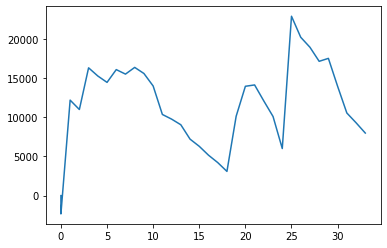

In [28]:
# Utilizar a função cumsum que acumula a soma dos resultados absolutos na coluna 'Resultado'

evolucao_patrimonio = df_compra_venda['Resultado'].cumsum()
evolucao_patrimonio = pd.concat([pd.Series([0]), evolucao_patrimonio])
evolucao_patrimonio.plot()

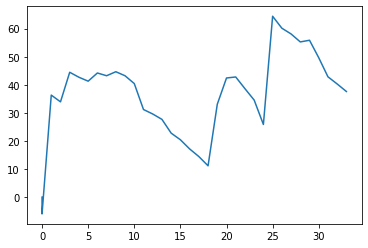

In [29]:
# Utilizando a soma dos resultados percentuais

evolucao_patrimonio_perc = df_compra_venda['Resultado_%'].cumsum()
evolucao_patrimonio_perc = pd.concat([pd.Series([0]), evolucao_patrimonio_perc])
evolucao_patrimonio_perc.plot()

## **7.3. Taxa de Acerto**

Porcentagem de trades com gain. Parâmetro muito comum, mas deve ser complementar. Individualmente não conta muito da história (mesmo ganhando pouco, quando ganhar, ganhar muito!)

In [30]:
# Uma forma menos usual de saber qts positivos/negativos

results_binning = np.sign(df_compra_venda['Resultado']).value_counts()
results_binning

-1.0    25
 1.0     9
Name: Resultado, dtype: int64

In [31]:
# Como é um pandas.series, o valor indexado refere-se não à posição, mas ao valor (se quisesse os negativos usaria -1 ao invés de 0)

Taxa_acerto = results_binning[1]/sum(results_binning)

## **7.4. Média de ganhos e perdas**

Complementar ao anterior. Verificar se não está com o viés do apostador (segurar muito no loss e se livrar logo no gain)

In [32]:
# Classificar em positivo ou negativo e usar o groupby para somar cada classe

df_compra_venda['Result_bin'] = np.sign(df_compra_venda['Resultado'])
pos_neg_medios = df_compra_venda.groupby('Result_bin').Resultado.mean()
pos_neg_medios

Result_bin
-1.0   -1705.050625
 1.0    5623.034505
Name: Resultado, dtype: float64

## **7.5. Fator de lucro**

Razão entre os ganhos e as perdas (qts vezes o lucro bruto é maior que a perda bruta?)

In [33]:
# Classificar em positivo ou negativo e usar o groupby para somar cada classe

df_compra_venda['Result_bin'] = np.sign(df_compra_venda['Resultado'])
pos_neg_results = df_compra_venda.groupby('Result_bin').Resultado.sum()
pos_neg_results

Result_bin
-1.0   -42626.265625
 1.0    50607.310547
Name: Resultado, dtype: float64

In [34]:
# Em valor absoluto, calcular a razão entre positivos e negativos
# Quanto maior a razão acima de 1, mais os ganhos superaram as perdas

abs(pos_neg_results[1]/pos_neg_results[-1])

1.1872330312039856

In [35]:
# Evoluçao do patrimônio nominal,  e gráfico de barras com resultado de cada trade

fig = make_subplots(rows=3, cols=1,vertical_spacing = 0.05)

fig.add_trace(go.Scatter(x=evolucao_patrimonio.index, y=evolucao_patrimonio,name='Evolução Patrimonio'),row=1,col=1)
fig.add_hline(y=0, line_width=3, line_dash="dash", line_color="black",row=1,col=1)

fig.add_trace(go.Scatter(x=evolucao_patrimonio_perc.index, y=evolucao_patrimonio_perc,name='Evolução Patrimonio %'),row=2,col=1)
fig.add_hline(y=0, line_width=3, line_dash="dash", line_color="black",row=2,col=1)

fig.add_trace(go.Bar(x=df_compra_venda.index, y=df_compra_venda['Resultado'], name='PnL'), row=3,col=1)
fig.add_hline(y=0, line_width=3, line_color="black",row=3,col=1)

fig.update_yaxes(title_text="<b> Valor nominal rendimentos (USD)", row=1, col=1)
fig.update_yaxes(title_text="<b> Operações PnL (USD)", row=3, col=1)
fig.update_layout(title_text='Evolução do Patrimônio e PnL')

fig.update_layout(title='', xaxis3_title="<b>Número de operações", yaxis1_title="<b>Patrimônio acumulado (USD)",
                  yaxis2_title="<b>Patrimônio acumulado (%)", legend_title="",
                  font=dict(family="Arial, Arial, Arial",size=10,color="black"),paper_bgcolor="#f7f8fa")

fig.update_layout(xaxis_rangeslider_visible=False, margin=dict(l=120, r=20, t=20, b=10), template = 'simple_white',
                  width=500,height=600,showlegend=False)

fig.show()

**7.6. Drawdowns e max drawdown**

Risk is the possibility of losing money. Therefore, upside volatility is not necessarily a risk. Instead, we focus on downside volatility. This is called the drawdown. We can compute the drawdown of any asset over time using python. The simple way to do this is to use a drawdown function.

In [ ]:
pct_change_data = cotacoes_BTC_yf.Close.pct_change()
pct_change_data

Date
2021-01-01         NaN
2021-01-02    0.093726
2021-01-03    0.020380
2021-01-04   -0.024712
2021-01-05    0.063197
                ...   
2021-12-27   -0.003328
2021-12-28   -0.060259
2021-12-29   -0.024042
2021-12-30    0.015791
2021-12-31   -0.018476
Name: Close, Length: 365, dtype: float64

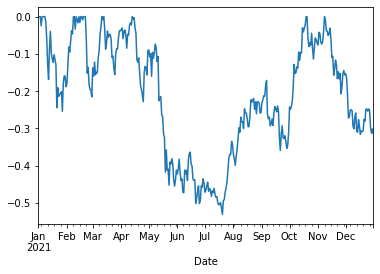

In [ ]:
wealth_index = 1000 * (1+pct_change_data).cumprod()
previous_peaks = wealth_index.cummax()
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [ ]:
min(drawdown.dropna())

-0.5306185040984175

**7.10. Comparação com o Buy & Hold no mesmo período**

Sempre bom comparar os resultados de benchmarks, nesse caso, se estivessemos comprado no primeiro dia de entrada e segurado o ativo

In [ ]:
# Dia da primeira compra

precos_compras.index[0]

Timestamp('2021-01-14 00:00:00')

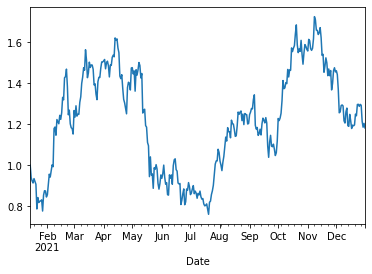

In [ ]:
preco_normalizado = cotacoes_BTC_yf[cotacoes_BTC_yf.index>=precos_compras.index[0]]['Adj Close']/precos_compras[0]
preco_normalizado.plot();

In [ ]:
evolucao_patrimonio_perc2 = (evolucao_patrimonio_perc /100)[1:] + 1
evolucao_patrimonio_perc2.index = precos_vendas.index
evolucao_patrimonio_perc3 = pd.concat([pd.Series(1),evolucao_patrimonio_perc2])
evolucao_patrimonio_perc3.rename(index={0:precos_compras.index[0]},inplace=True)
evolucao_patrimonio_perc3

2021-01-14    1.000000
2021-01-15    0.940366
2021-02-23    1.363355
2021-03-02    1.339242
2021-03-15    1.444512
2021-03-18    1.426808
2021-03-21    1.412847
2021-04-03    1.441966
2021-04-06    1.432191
2021-04-17    1.446489
2021-05-04    1.432087
2021-05-10    1.404336
2021-05-28    1.311939
2021-06-01    1.296015
2021-06-04    1.276886
2021-06-12    1.227842
2021-06-17    1.204327
2021-07-01    1.171756
2021-07-05    1.144580
2021-07-12    1.111634
2021-08-02    1.330669
2021-08-17    1.424167
2021-08-26    1.427836
2021-08-30    1.386097
2021-09-07    1.345528
2021-09-20    1.258778
2021-10-22    1.643970
2021-10-26    1.601441
2021-11-01    1.580937
2021-11-04    1.552572
2021-11-15    1.558525
2021-12-03    1.496317
2021-12-13    1.428375
2021-12-16    1.402879
2021-12-28    1.376044
dtype: float64

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=preco_normalizado.index, y=preco_normalizado,name='Buy & Hold'))

fig.add_trace(go.Scatter(x=evolucao_patrimonio_perc3.index, y=evolucao_patrimonio_perc3,name='Evolução Setup %'))

fig.update_layout(title='', xaxis_title="<b>Data", yaxis_title="<b>Valores Normalizados",
                  legend_title="", font=dict(family="Arial, Arial, Arial",size=10,color="black"),paper_bgcolor="#f7f8fa")

fig.update_layout(xaxis_rangeslider_visible=False, margin=dict(l=120, r=20, t=20, b=10), template = 'simple_white',
                  width=1000,height=600,showlegend=False)

fig.show()

**7.5. Máximo Drawdown**

Rebaixamento máximo percentual do saldo em relação ao capital líquido.

In [ ]:
# Faremos dois gráficos um de linha para a evoluçao do patrimônio e outro de barras para visualizar trades positivos e negativos

fig = make_subplots(rows=3, cols=1)
fig.add_trace(go.Scatter(x=df_lis_resultado.index, y=df_lis_resultado['EvolucaoPatrimonio'],name='Evolução Patrimonio'),row=1,col=1)
fig.add_trace(go.Bar(x=df_lis_resultado.index, y=df_lis_resultado['Resultado'], name='PnL'), row=2,col=1)
fig.update_yaxes(title_text="<b> Valor Caixa (R$)", row=1, col=1)
fig.update_yaxes(title_text="<b> PnL Ops (R$)", row=2, col=1)
fig.update_layout(title_text='Evolução do Patrimônio e PnL',width=1000 ,height=800)
fig.show()

In [ ]:
# A melhor forma de visualizar o resultado líquido é normalizar 

##4. Calculando retornos do portfólio

In [ ]:
retorno_precos = carteira_precos.pct_change()

In [ ]:
retorno_precos

,ITSA4,PETR4,ABEV3,VALE3
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,0.016588,-0.027314,0.015345,-0.013396
2016-01-06,0.009324,-0.042122,-0.009446,-0.073482
2016-01-07,-0.013857,-0.021173,-0.026701,-0.059483
2016-01-08,0.000000,0.001664,0.013063,-0.033914
...,...,...,...,...
2020-12-22,0.001757,0.009623,0.005837,0.000921
2020-12-23,0.023684,0.024560,-0.000645,0.004831
2020-12-28,0.011140,0.008229,0.017419,-0.000572


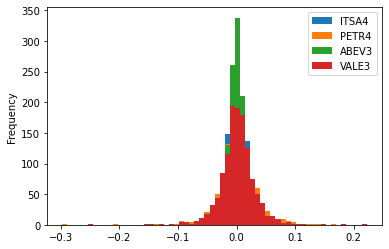

In [ ]:
retorno_precos.plot.hist(bins=60);

In [ ]:
retorno_acm_acoes = (1+retorno_precos).cumprod()

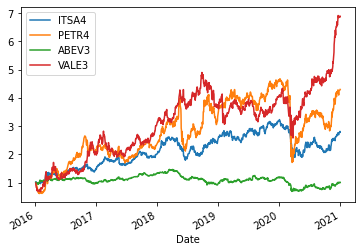

In [ ]:
retorno_acm_acoes.plot()

In [ ]:
retorno_carteira = (retorno_precos * pesos).sum(axis=1)

In [ ]:
retorno_portfolio = pd.DataFrame()
retorno_portfolio['Retornos'] = retorno_carteira

In [ ]:
retorno_portfolio

,Retornos
Date,
2016-01-04,0.000000
2016-01-05,-0.002194
2016-01-06,-0.028931
2016-01-07,-0.030303
2016-01-08,-0.004797
...,...
2020-12-22,0.004534
2020-12-23,0.013108
2020-12-28,0.009054


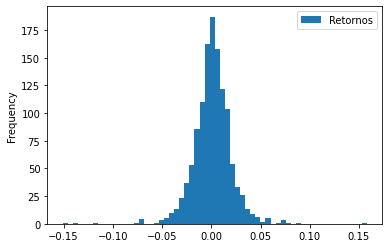

In [ ]:
retorno_portfolio.plot.hist(bins=60);


In [ ]:
retorno_portfolio.describe()

,Retornos
count,1237.000000
mean,0.001242
std,0.019719
min,-0.151025
25%,-0.008658
50%,0.001407
75%,0.011717
max,0.158050


In [ ]:
retorno_acm_carteira = (1+retorno_portfolio).cumprod()

In [ ]:
retorno_acm_carteira.head()

,Retornos
Date,
2016-01-04,1.000000
2016-01-05,0.997806
2016-01-06,0.968938
2016-01-07,0.939576
2016-01-08,0.935069


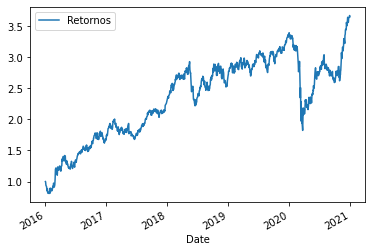

In [ ]:
retorno_acm_carteira.plot();

###5. Calculando volatilidade do portfólio

In [ ]:
cov_matrix = retorno_precos.cov()

In [ ]:
cov_matrix

,ITSA4,PETR4,ABEV3,VALE3
ITSA4,0.000424,0.000416,0.000182,0.000226
PETR4,0.000416,0.001090,0.000241,0.000511
ABEV3,0.000182,0.000241,0.000326,0.000150
VALE3,0.000226,0.000511,0.000150,0.000934


In [ ]:
vol_carteira = np.sqrt(np.dot(pesos.T, np.dot(cov_matrix,pesos)))

In [ ]:
vol_carteira

0.01972716075548658

In [ ]:
vol_ano = vol_carteira*np.sqrt(252)

In [ ]:
vol_ano

0.31315896859446335

##6. Benchmark da Carteira


In [ ]:
ibov = investpy.get_index_historical_data(index='Bovespa', country='Brazil', from_date='01/01/2016', to_date='30/12/2020').Close

In [ ]:
ibov

Date
2016-01-04     42141.0
2016-01-05     42419.0
2016-01-06     41773.0
2016-01-07     40695.0
2016-01-08     40612.0
                ...   
2020-12-22    116636.0
2020-12-23    117807.0
2020-12-28    119124.0
2020-12-29    119409.0
2020-12-30    119017.0
Name: Close, Length: 1237, dtype: float64

In [ ]:
ibov_retornos = ibov.pct_change()
ibov_acm = (1+ibov_retornos).cumprod()

In [ ]:
ibov_acm.head()

Date
2016-01-04         NaN
2016-01-05    1.006597
2016-01-06    0.991267
2016-01-07    0.965687
2016-01-08    0.963717
Name: Close, dtype: float64

In [ ]:
#Criar df do benchmark

benchmark = pd.merge(retorno_acm_carteira, ibov_acm, how='inner', right_index=True, left_index=True)

In [ ]:
benchmark

,Retornos,Close
Date,,
2016-01-04,1.000000,NaN
2016-01-05,0.997806,1.006597
2016-01-06,0.968938,0.991267
2016-01-07,0.939576,0.965687
2016-01-08,0.935069,0.963717
...,...,...
2020-12-22,3.574179,2.767756
2020-12-23,3.621028,2.795544
2020-12-28,3.653813,2.826796


In [ ]:
benchmark= benchmark.dropna()

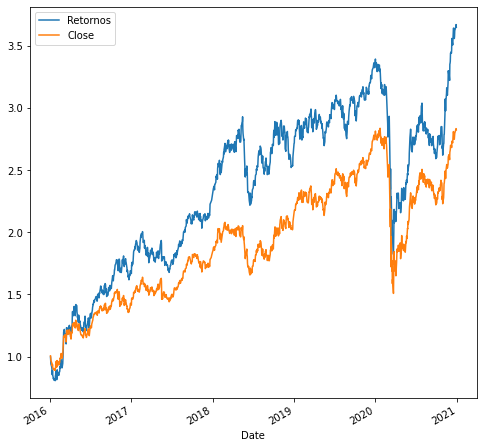

In [ ]:
benchmark.plot(figsize=(8,8));

##7. Beta da Carteira

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
benchmark = benchmark.rename({'Close': 'IBOV'}, axis=1)

In [ ]:
benchmark = benchmark.rename({'Retornos': 'Carteira'}, axis=1)

In [ ]:
benchmark

,Carteira,IBOV
Date,,
2016-01-05,0.997806,1.006597
2016-01-06,0.968938,0.991267
2016-01-07,0.939576,0.965687
2016-01-08,0.935069,0.963717
2016-01-11,0.914523,0.948008
...,...,...
2020-12-22,3.574179,2.767756
2020-12-23,3.621028,2.795544
2020-12-28,3.653813,2.826796


In [ ]:
Y = benchmark['Carteira']
X = benchmark['IBOV']

X = sm.add_constant(X)

modelo = sm.OLS(Y,X)
resultado = modelo.fit()

In [ ]:
resultado

In [ ]:
beta_carteira = resultado.params[1]

In [ ]:
beta_carteira

1.3406588148269742

##9. Janelas de Tempo (Rolling Windows)

In [ ]:
#Média Móvel dos Retornos do Portfolio

mm_portfolio = retorno_portfolio.rolling(window=100).mean()

In [ ]:
mm_portfolio

,Retornos
Date,
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,NaN
2016-01-08,NaN
...,...
2020-12-22,0.002033
2020-12-23,0.002423
2020-12-28,0.002603


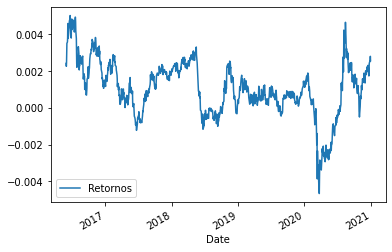

In [ ]:
mm_portfolio.plot();

In [ ]:
#Drawdown 30 dias 

rolling_drawdown = retorno_portfolio.rolling(window=30).min()

In [ ]:
rolling_drawdown

,Retornos
Date,
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,NaN
2016-01-08,NaN
...,...
2020-12-22,-0.023113
2020-12-23,-0.023113
2020-12-28,-0.023113


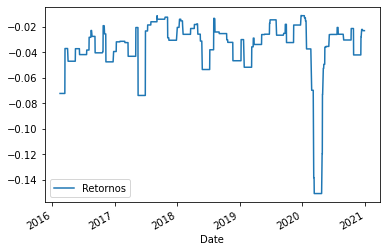

In [ ]:
rolling_drawdown.plot();

##10. Value At Risk

In [ ]:
#VaR Histórico

import numpy as np

In [ ]:
var_95 = np.nanpercentile(retorno_portfolio,5)
var_98 = np.nanpercentile(retorno_portfolio,2)
var_99 = np.nanpercentile(retorno_portfolio,1)

print(var_95, var_98, var_99)

-0.02759927055379177 -0.038187509795320276 -0.04743489063032398


In [ ]:
#VaR Parametrico

media_retorno_portofolio = np.mean(retorno_portfolio)
desvio_carteira = vol_carteira

In [ ]:
from scipy.stats import norm

In [ ]:
var_p_90 = norm.ppf(1-0.9, media_retorno_portofolio, desvio_carteira)
var_p_90

array([-0.02403914])

In [ ]:
var_p_98 = norm.ppf(1-0.98, media_retorno_portofolio, desvio_carteira)
var_p_98

array([-0.0392724])

##11. Retorno Anualizado

In [ ]:
retorno_anualizado = (carteira_precos.iloc[-1]-carteira_precos.iloc[0])/(carteira_precos.iloc[0])

In [ ]:
retorno_anualizado

ITSA4    1.779621
PETR4    3.300455
ABEV3    0.000639
VALE3    5.891253
dtype: float64

In [ ]:
retorno_an_carteira = ((1+retorno_anualizado)**(12/60))-1
retorno_an_carteira

ITSA4    0.226866
PETR4    0.338760
ABEV3    0.000128
VALE3    0.471159
dtype: float64

In [ ]:
retorno_an_carteira = retorno_an_carteira.dot(pesos)
retorno_an_carteira

0.25922834139625117

#12.Sharpe Ratio

S = (Rp - Rf)/Vol Portfolio

In [ ]:
#Selic - taxa livre de risco

selic = 0.0625

In [ ]:
sharpe_ratio = ((retorno_portfolio.mean()*252)-selic)/(vol_ano)

sharpe_ratio

Retornos    0.800048
dtype: float64

##13. Sortino Ratio 

Sortino = (Rp - Rf)/Semivariancia

In [ ]:
sortino = ((retorno_portfolio.mean()*252)-selic)/(retorno_portfolio[retorno_portfolio<0].std()*np.sqrt(252))
sortino

Retornos    1.054668
dtype: float64

##14. Max Drawdown

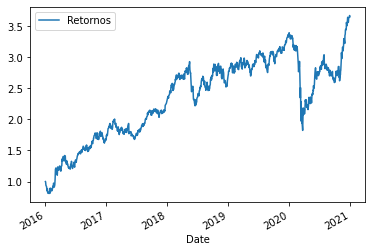

In [ ]:
retorno_acm_carteira.plot();

In [ ]:
pico = retorno_acm_carteira.expanding(min_periods=1).max()
dd = (retorno_acm_carteira/pico)-1
drawdown = dd.min()
drawdown

Retornos   -0.462849
dtype: float64

##15. Calmar Ratio

Calmar = Retorno Portfolio / Max Drawdown

In [ ]:
calmar = (retorno_portfolio.mean()*252)/abs(drawdown)
calmar

Retornos    0.676337
dtype: float64